# Digitale Informationen

Digitale Informationenen, also beispielsweise Messwerte oder Signale, können nur endlich viele Werte annehmen. Das bedeutet, dass die Werte- und Zeitbereiche in endlich viele Intervalle aufgeteilt werden und somit quantisiert bzw. diskretisiert werden.

Trotz dieses Nachteils gegenüber analogen Informationen, gibt es eine Vielzahl von Vorteilen:
* einfache und schnelle Vervielfältigung und Übertragung
* hohe Flexibilität bei der Speicherung und Darstellung 
* einfache (Weiter-) Verarbeitung
* Möglichkeit der Validierung und Verschlüsselung

## Umwandlung analoger zu digitaler Signale

Um aus analogen Werten, z.B. aus einem Experiment, digitale Werte für die Auswertung zu gewinnen, werden [Analog-Digital-Wandler (ADC)](https://de.wikipedia.org/wiki/Analog-Digital-Umsetzer) genutzt. Einfach gesagt, tastet ein ADC ein Signal mit einer vorgegebenen (endlichen) Abtastrate ab. Dabei wird der Signalwert einem der (endlich vielen) vorgegebenen Werteintervalle zugeordnet. 
Folgende Abbildung zeigt ein Beispiel für die Umwandlung eines analogen Signals (blaue Kurve) in ein digitales (rote Punkte). Hier ist das Abtastintervall im Zeit- und Wertbereich jeweils Eins, in der Abbildung durch das graue Gitter veranschaulicht. Damit kann die vom ADC Folge von Werten nur Punkte auf dem Gitter enthalten.

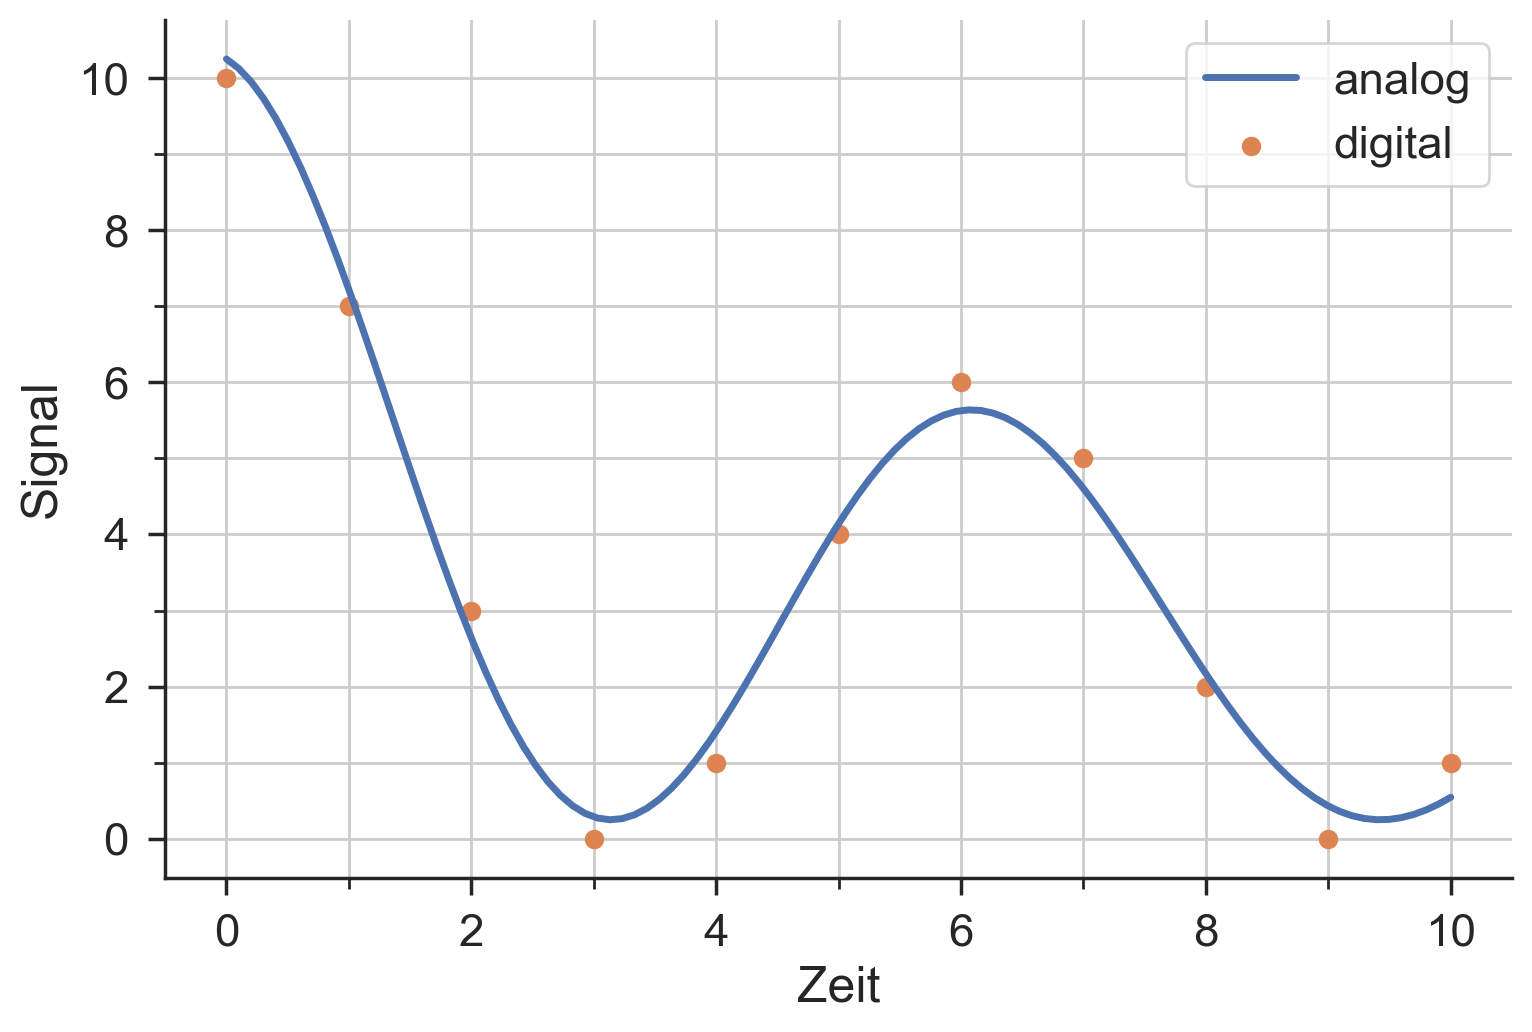

In [68]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
sns.set()
#sns.set(style="whitegrid")
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#plt.style.use("seaborn-notebook")

t = np.linspace(0, 10, 100)
f = (np.cos(t) + 1) * 5*np.exp(-t/10) + 0.25

td = np.linspace(0, 10, 11)
fd = np.round((np.cos(td) + 1) * 5*np.exp(-td/10) + 0.25)


#ax = sns.lineplot(t, f)
plt.plot(t, f, label='analog')
plt.scatter(td, fd, label='digital', color="C1")
plt.xlabel("Zeit")
plt.ylabel("Signal")

#ax.set(xlabel="Zeit", ylabel="Signal", label='analog')
sns.despine()


xmajor_ticks = np.arange(0, 12, 2)
xminor_ticks = np.arange(0, 11, 1)
ymajor_ticks = np.arange(0, 12, 2)
yminor_ticks = np.arange(0, 11, 1)

ax = plt.gca()

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

plt.tight_layout()
plt.grid(which='both')
plt.legend()
plt.savefig('./bilder/signal_digital_analog.png')

## Beispiel Temperaturmessung



[DS18B20](https://datasheets.maximintegrated.com/en/ds/DS18B20.pdf)

![DS18B20](./bilder/DS18B20.png)

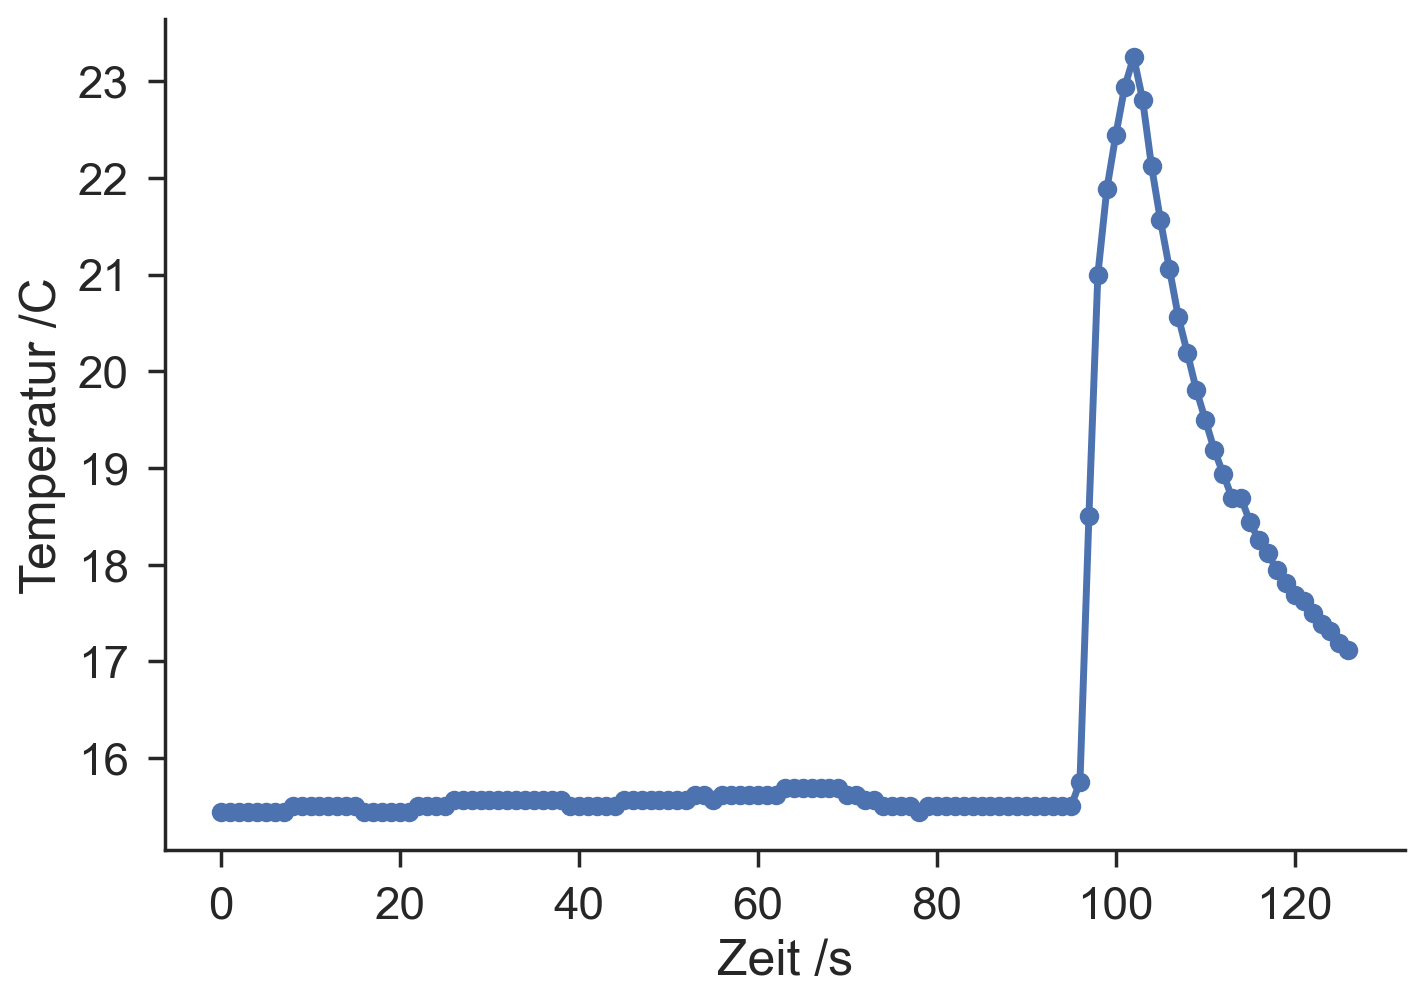

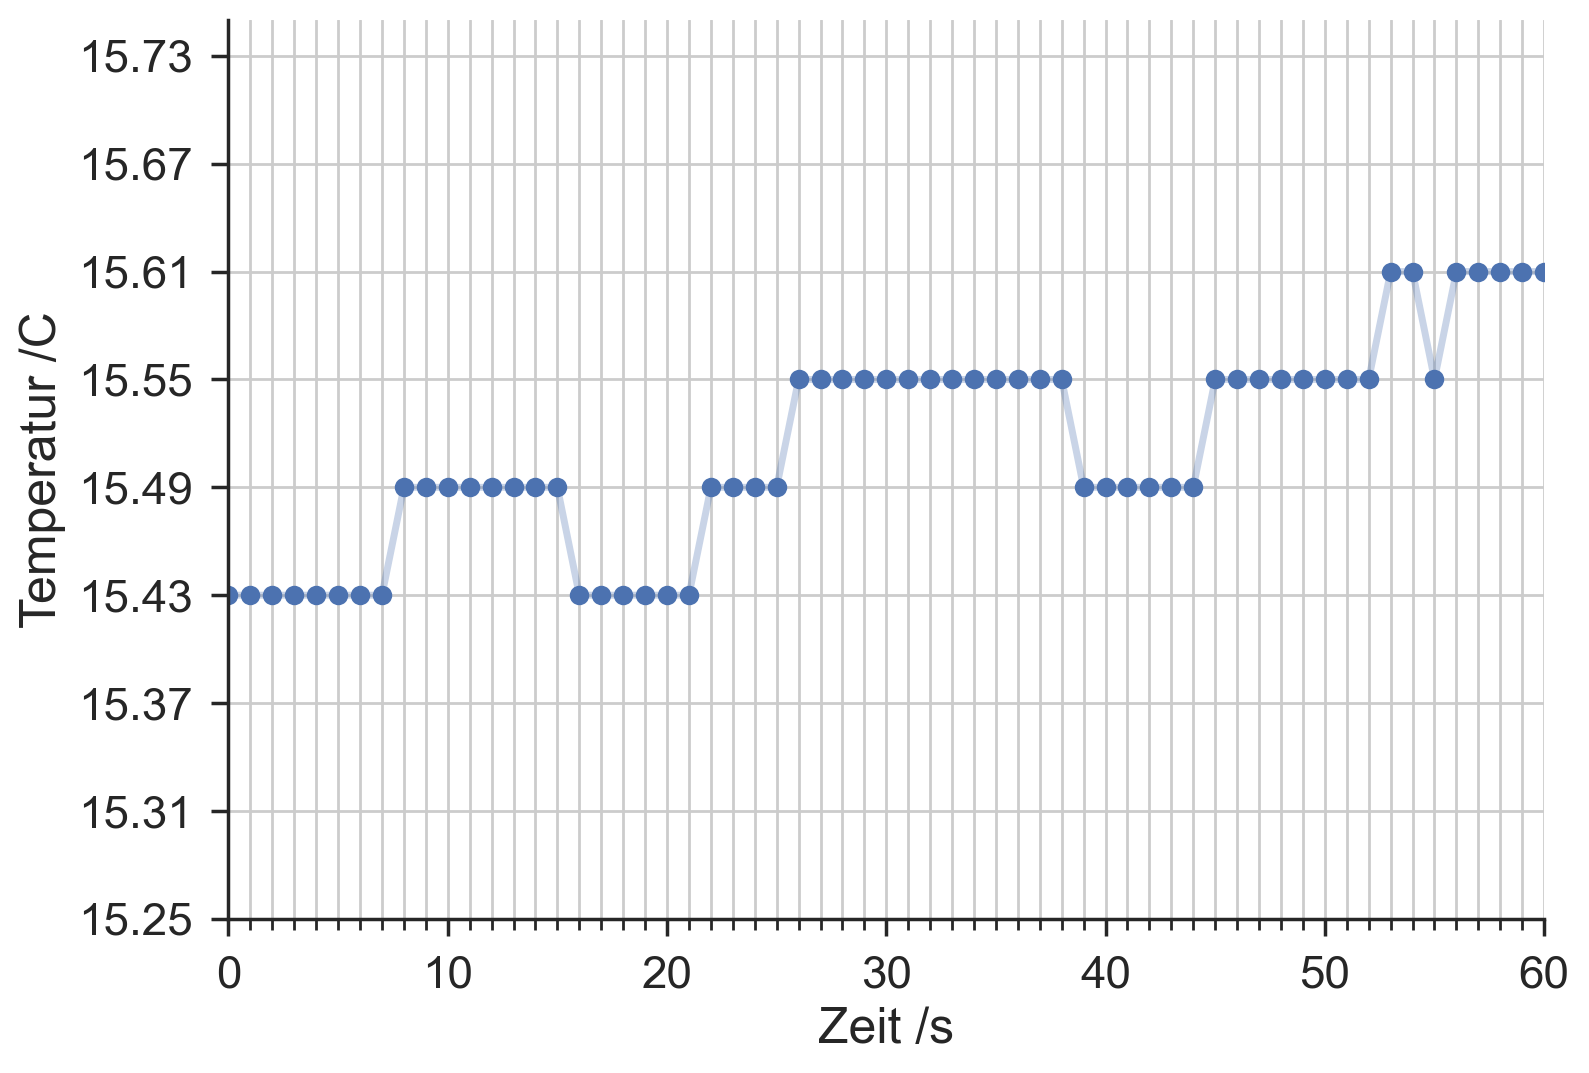

In [71]:
temp_data = np.array([15.44, 15.44, 15.44, 15.44, 15.44, 15.44, 15.44, 
                      15.44, 15.50, 15.50, 15.50, 15.50, 15.50, 15.50,
                      15.50, 15.50, 15.44, 15.44, 15.44, 15.44, 15.44, 
                      15.44, 15.50, 15.50, 15.50, 15.50, 15.56, 15.56, 
                      15.56, 15.56, 15.56, 15.56, 15.56, 15.56, 15.56, 
                      15.56, 15.56, 15.56, 15.56, 15.50, 15.50, 15.50, 
                      15.50, 15.50, 15.50, 15.56, 15.56, 15.56, 15.56, 
                      15.56, 15.56, 15.56, 15.56, 15.62, 15.62, 15.56, 
                      15.62, 15.62, 15.62, 15.62, 15.62, 15.62, 15.62, 
                      15.69, 15.69, 15.69, 15.69, 15.69, 15.69, 15.69, 
                      15.62, 15.62, 15.56, 15.56, 15.50, 15.50, 15.50, 
                      15.50, 15.44, 15.50, 15.50, 15.50, 15.50, 15.50, 
                      15.50, 15.50, 15.50, 15.50, 15.50, 15.50, 
                      15.50, 15.50, 15.50, 15.50, 15.50, 15.50, 15.75, 
                      18.50, 21.00, 21.88, 22.44, 22.94, 23.25, 22.81, 
                      22.12, 21.56, 21.06, 20.56, 20.19, 19.81, 19.50, 
                      19.19, 18.94, 18.69, 18.69, 18.44, 18.25, 18.12, 
                      17.94, 17.81, 17.69, 17.62, 17.50, 17.38, 17.31, 
                      17.19, 17.12])
time_data = range(len(temp_data))

temp_range = 125 - (-55)
temp_n = 2**12
temp_delta = temp_range / temp_n
#print(temp_delta)

# print((temp_data+55) / temp_delta)
# print(temp_data)
# print(-55 + 0.05 + np.floor((temp_data+55) / temp_delta) * temp_delta)

plt.plot(temp_data)
plt.scatter(time_data, temp_data)
plt.xlabel('Zeit /s')
plt.ylabel('Temperatur /C')
sns.despine()
plt.savefig('./bilder/temperatur_digital_all.png')
plt.show()
plt.clf()

xmajor_ticks = np.arange(0, 61, 10)
xminor_ticks = np.arange(0, 61, 1)
ymajor_ticks = np.arange(15.25, 15.75, 0.06)
yminor_ticks = np.arange(15.25, 15.75, 0.06)

ax = plt.gca()

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)
plt.tight_layout()
plt.grid(which='both')

plt.plot(temp_data - 0.01, alpha=0.3)
plt.scatter(time_data, temp_data - 0.01)
plt.xlabel('Zeit /s')
plt.ylabel('Temperatur /C')
plt.xlim([0,60])
plt.ylim([15.25, 15.75])
sns.despine()
plt.savefig('./bilder/temperatur_digital_zoom.png')

## Speicherung digitaler Werte

## Übertragung digitaler Signale

* Um mit digitalen / diskreten Werten und Signalen zu operieren, werden diese als Reihen von zwei Zuständen (0 und 1, oder wahr und falsch) dargestellt.
* In der Elektrotechnik wird der Zustand (1) durch eine angelegte Spannung (z.B. 5V) dargestellt. Der Zustand (0) etspricht einer spannungsfreien Leitung.
* Digitale Signale sind immer getaktet, dadurch wird der Zeitraum der Validität vorgegeben.

|![Analoges Signal](./bilder/tmp_i2c.png)|
|:--:|
| Bild anpassen?|